<a href="https://colab.research.google.com/github/saish-res-phd/RANPerformanceAI/blob/main/RAN_performance_measurement_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


The dataset is available here:-
RAN Performance measurements for security threats - Mendeley Data
Performance measurement dataset for open RAN with user mobility and security threats - ScienceDirect


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive', force_remount=True)


# Verify the folder path by listing its contents
folder_path = '/content/drive/MyDrive/RAN performance measurement data/'
RANperfdf = pd.read_csv(folder_path + 'dtst.csv', sep=';')
RANperfdf

Mounted at /content/drive


,mac_rnti,mac_dl_cqi,mac_dl_mcs,mac_dl_brate,mac_dl_ok,mac_dl_nok,phy_ul_pusch_sinr,phy_ul_pucch_sinr,phy_ul_mcs,mac_ul_brate,...,phy_dl_n_samples,rf_o,rf_u,rf_l,rf_error,label,ue_ident,timestamp,id_ue,mob_pattern
0,3540,8,14,34577,1,0,27.973768,29.404709,20.250000,360977,...,7,0,0,0,0,portscan,3540,1.666859e+14,1,car
1,3540,6,12,1034844,16,6,25.914433,30.450718,18.360001,3849777,...,70,0,0,0,0,portscan,3540,1.666859e+14,1,car
2,3540,7,11,5538,1,0,30.937387,30.019136,13.142858,49494,...,3,0,0,0,0,portscan,3540,1.666859e+14,1,car
3,3540,8,12,33155,1,0,31.344568,29.917725,19.600000,153244,...,5,0,0,0,0,portscan,3540,1.666859e+14,1,car
4,3540,5,11,1196444,14,12,22.785067,30.253895,19.829546,4017600,...,62,0,0,0,0,portscan,3540,1.666859e+14,1,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175135,3485,7,1,158044,9,0,8.972639,28.047401,4.027778,220711,...,22,0,0,0,0,SIPP,3485,1.666858e+14,3,car
3175136,3487,7,7,3780533,54,6,31.494026,30.003418,16.181818,292888,...,157,0,0,0,0,youtube,3487,1.666858e+14,3,car
3175137,3485,7,5,48800,1,0,4.118367,27.231884,4.521739,184533,...,3,0,0,0,0,SIPP,3485,1.666858e+14,3,car
3175138,3485,9,6,48800,1,0,7.760087,30.364777,2.461539,106400,...,3,0,0,0,0,slowloris-C,3485,1.666858e+14,2,car


In [ ]:
# prompt: convert 'timestamp' which is unix epoch time in microseconds to actual correct time:you can make use of import time; time.strftime("%a, %d %b %Y %H:%M:%S:%MS", time.localtime(epoch)) Replace time.localtime with time.gmtime for GMT time. Or using datetime: import datetime; datetime.datetime.utcfromtimestamp(epoch).replace(tzinfo=datetime.timezone.utc)

import time
import datetime

# Assuming 'timestamp' column is in microseconds
RANperfdf['timestamp'] = RANperfdf['timestamp'].apply(lambda x: datetime.datetime.utcfromtimestamp(x/1000000).replace(tzinfo=datetime.timezone.utc))
RANperfdf


,mac_rnti,mac_dl_cqi,mac_dl_mcs,mac_dl_brate,mac_dl_ok,mac_dl_nok,phy_ul_pusch_sinr,phy_ul_pucch_sinr,phy_ul_mcs,mac_ul_brate,...,phy_dl_n_samples,rf_o,rf_u,rf_l,rf_error,label,ue_ident,timestamp,id_ue,mob_pattern
0,3540,8,14,34577,1,0,27.973768,29.404709,20.250000,360977,...,7,0,0,0,0,portscan,3540,1975-04-14 05:38:55.406523+00:00,1,car
1,3540,6,12,1034844,16,6,25.914433,30.450718,18.360001,3849777,...,70,0,0,0,0,portscan,3540,1975-04-14 05:38:55.415437+00:00,1,car
2,3540,7,11,5538,1,0,30.937387,30.019136,13.142858,49494,...,3,0,0,0,0,portscan,3540,1975-04-14 05:38:55.460261+00:00,1,car
3,3540,8,12,33155,1,0,31.344568,29.917725,19.600000,153244,...,5,0,0,0,0,portscan,3540,1975-04-14 05:38:55.514405+00:00,1,car
4,3540,5,11,1196444,14,12,22.785067,30.253895,19.829546,4017600,...,62,0,0,0,0,portscan,3540,1975-04-14 05:38:55.523587+00:00,1,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175135,3485,7,1,158044,9,0,8.972639,28.047401,4.027778,220711,...,22,0,0,0,0,SIPP,3485,1975-04-14 05:36:11.400029+00:00,3,car
3175136,3487,7,7,3780533,54,6,31.494026,30.003418,16.181818,292888,...,157,0,0,0,0,youtube,3487,1975-04-14 05:36:11.408919+00:00,3,car
3175137,3485,7,5,48800,1,0,4.118367,27.231884,4.521739,184533,...,3,0,0,0,0,SIPP,3485,1975-04-14 05:36:11.423352+00:00,3,car
3175138,3485,9,6,48800,1,0,7.760087,30.364777,2.461539,106400,...,3,0,0,0,0,slowloris-C,3485,1975-04-14 05:36:14.758907+00:00,2,car




---

Before doing some plots chicking  for null values if any and also about how big is dataset


---



In [ ]:

# Check for null values in the DataFrame
RANperfdf.isnull().sum()



,0
mac_rnti,0
mac_dl_cqi,0
mac_dl_mcs,0
mac_dl_brate,0
mac_dl_ok,0
mac_dl_nok,0
phy_ul_pusch_sinr,0
phy_ul_pucch_sinr,0
phy_ul_mcs,0
mac_ul_brate,0


In [ ]:
RANperfdf.describe()

,mac_rnti,mac_dl_cqi,mac_dl_mcs,mac_dl_brate,mac_dl_ok,mac_dl_nok,phy_ul_pusch_sinr,phy_ul_pucch_sinr,phy_ul_mcs,mac_ul_brate,...,phy_dl_mcs,phy_dl_pucch_tpc,phy_dl_n_samples,rf_o,rf_u,rf_l,rf_error,ue_ident,timestamp,id_ue
count,3.175140e+06,3.175140e+06,3.175140e+06,3.175140e+06,3.175140e+06,3.175140e+06,3.175140e+06,3.175140e+06,3.175140e+06,3.175140e+06,...,3.175140e+06,3175140.0,3.175140e+06,3175140.0,3175140.0,3175140.0,3.175140e+06,3.175140e+06,3.175140e+06,3.175140e+06
mean,2.284718e+03,7.118428e+00,7.557613e+00,1.531344e+06,2.727332e+01,4.159235e+00,2.496198e+01,4.068774e+01,1.338649e+01,1.218844e+06,...,7.898098e+00,0.0,7.348879e+01,0.0,0.0,0.0,5.502120e-04,2.284718e+03,1.666748e+14,2.471178e+00
std,1.423274e+03,1.642408e+00,5.212904e+00,1.698721e+06,2.509360e+01,1.087689e+01,1.175325e+01,1.153763e+02,6.376479e+00,1.574187e+06,...,5.227607e+00,0.0,7.020304e+01,0.0,0.0,0.0,2.345015e-02,1.423274e+03,7.368792e+09,8.233864e-01
min,7.400000e+01,0.000000e+00,0.000000e+00,6.080000e+02,1.000000e+00,0.000000e+00,-4.244647e+00,-2.198267e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,7.400000e+01,1.666612e+14,1.000000e+00
25%,9.590000e+02,6.000000e+00,3.000000e+00,8.311100e+04,2.000000e+00,0.000000e+00,2.053734e+01,2.817458e+01,1.233333e+01,1.036440e+05,...,3.714286e+00,0.0,5.000000e+00,0.0,0.0,0.0,0.000000e+00,9.590000e+02,1.666691e+14,2.000000e+00
50%,2.390000e+03,7.000000e+00,7.000000e+00,1.101155e+06,2.500000e+01,1.000000e+00,2.962336e+01,3.004029e+01,1.511764e+01,2.820440e+05,...,7.860412e+00,0.0,6.700000e+01,0.0,0.0,0.0,0.000000e+00,2.390000e+03,1.666738e+14,3.000000e+00
75%,3.336000e+03,8.000000e+00,1.100000e+01,2.561066e+06,4.500000e+01,3.000000e+00,3.228069e+01,3.228015e+01,1.815385e+01,2.070666e+06,...,1.100000e+01,0.0,1.230000e+02,0.0,0.0,0.0,0.000000e+00,3.336000e+03,1.666810e+14,3.000000e+00
max,5.836000e+03,1.500000e+01,2.100000e+01,2.156386e+07,2.718000e+03,1.120000e+02,4.252279e+01,7.807323e+03,3.100000e+01,1.177209e+07,...,2.100000e+01,0.0,7.112000e+03,0.0,0.0,0.0,1.000000e+00,5.836000e+03,1.666878e+14,4.000000e+00


In [ ]:
# convert timestamp to date/time
RANperfdf['timestamp'] = pd.to_datetime(RANperfdf['timestamp'], format='mixed')

RANperfdf

,mac_rnti,mac_dl_cqi,mac_dl_mcs,mac_dl_brate,mac_dl_ok,mac_dl_nok,phy_ul_pusch_sinr,phy_ul_pucch_sinr,phy_ul_mcs,mac_ul_brate,...,phy_dl_n_samples,rf_o,rf_u,rf_l,rf_error,label,ue_ident,timestamp,id_ue,mob_pattern
0,3540,8,14,34577,1,0,27.973768,29.404709,20.250000,360977,...,7,0,0,0,0,portscan,3540,1970-01-02 22:18:05.935406523,1,car
1,3540,6,12,1034844,16,6,25.914433,30.450718,18.360001,3849777,...,70,0,0,0,0,portscan,3540,1970-01-02 22:18:05.935415437,1,car
2,3540,7,11,5538,1,0,30.937387,30.019136,13.142858,49494,...,3,0,0,0,0,portscan,3540,1970-01-02 22:18:05.935460261,1,car
3,3540,8,12,33155,1,0,31.344568,29.917725,19.600000,153244,...,5,0,0,0,0,portscan,3540,1970-01-02 22:18:05.935514405,1,car
4,3540,5,11,1196444,14,12,22.785067,30.253895,19.829546,4017600,...,62,0,0,0,0,portscan,3540,1970-01-02 22:18:05.935523586,1,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175135,3485,7,1,158044,9,0,8.972639,28.047401,4.027778,220711,...,22,0,0,0,0,SIPP,3485,1970-01-02 22:18:05.771400028,3,car
3175136,3487,7,7,3780533,54,6,31.494026,30.003418,16.181818,292888,...,157,0,0,0,0,youtube,3487,1970-01-02 22:18:05.771408919,3,car
3175137,3485,7,5,48800,1,0,4.118367,27.231884,4.521739,184533,...,3,0,0,0,0,SIPP,3485,1970-01-02 22:18:05.771423351,3,car
3175138,3485,9,6,48800,1,0,7.760087,30.364777,2.461539,106400,...,3,0,0,0,0,slowloris-C,3485,1970-01-02 22:18:05.774758906,2,car




---

Excluding the columns having string data for time being, we can conver the string data in to values when we need to use specific columns depending on problem statement

---



In [ ]:

RANperfdf = RANperfdf.select_dtypes(exclude=['object'])
RANperfdf


,mac_rnti,mac_dl_cqi,mac_dl_mcs,mac_dl_brate,mac_dl_ok,mac_dl_nok,phy_ul_pusch_sinr,phy_ul_pucch_sinr,phy_ul_mcs,mac_ul_brate,...,phy_dl_mcs,phy_dl_pucch_tpc,phy_dl_n_samples,rf_o,rf_u,rf_l,rf_error,ue_ident,timestamp,id_ue
0,3540,8,14,34577,1,0,27.973768,29.404709,20.250000,360977,...,14.714286,0,7,0,0,0,0,3540,1970-01-02 22:18:05.935406523,1
1,3540,6,12,1034844,16,6,25.914433,30.450718,18.360001,3849777,...,12.885715,0,70,0,0,0,0,3540,1970-01-02 22:18:05.935415437,1
2,3540,7,11,5538,1,0,30.937387,30.019136,13.142858,49494,...,11.000000,0,3,0,0,0,0,3540,1970-01-02 22:18:05.935460261,1
3,3540,8,12,33155,1,0,31.344568,29.917725,19.600000,153244,...,12.600000,0,5,0,0,0,0,3540,1970-01-02 22:18:05.935514405,1
4,3540,5,11,1196444,14,12,22.785067,30.253895,19.829546,4017600,...,11.758064,0,62,0,0,0,0,3540,1970-01-02 22:18:05.935523586,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175135,3485,7,1,158044,9,0,8.972639,28.047401,4.027778,220711,...,1.909091,0,22,0,0,0,0,3485,1970-01-02 22:18:05.771400028,3
3175136,3487,7,7,3780533,54,6,31.494026,30.003418,16.181818,292888,...,7.490446,0,157,0,0,0,0,3487,1970-01-02 22:18:05.771408919,3
3175137,3485,7,5,48800,1,0,4.118367,27.231884,4.521739,184533,...,5.000000,0,3,0,0,0,0,3485,1970-01-02 22:18:05.771423351,3
3175138,3485,9,6,48800,1,0,7.760087,30.364777,2.461539,106400,...,6.000000,0,3,0,0,0,0,3485,1970-01-02 22:18:05.774758906,2




---
Plotting cross-correlation to see the relationship between columns and this will also help to choose relevant features for our model
---



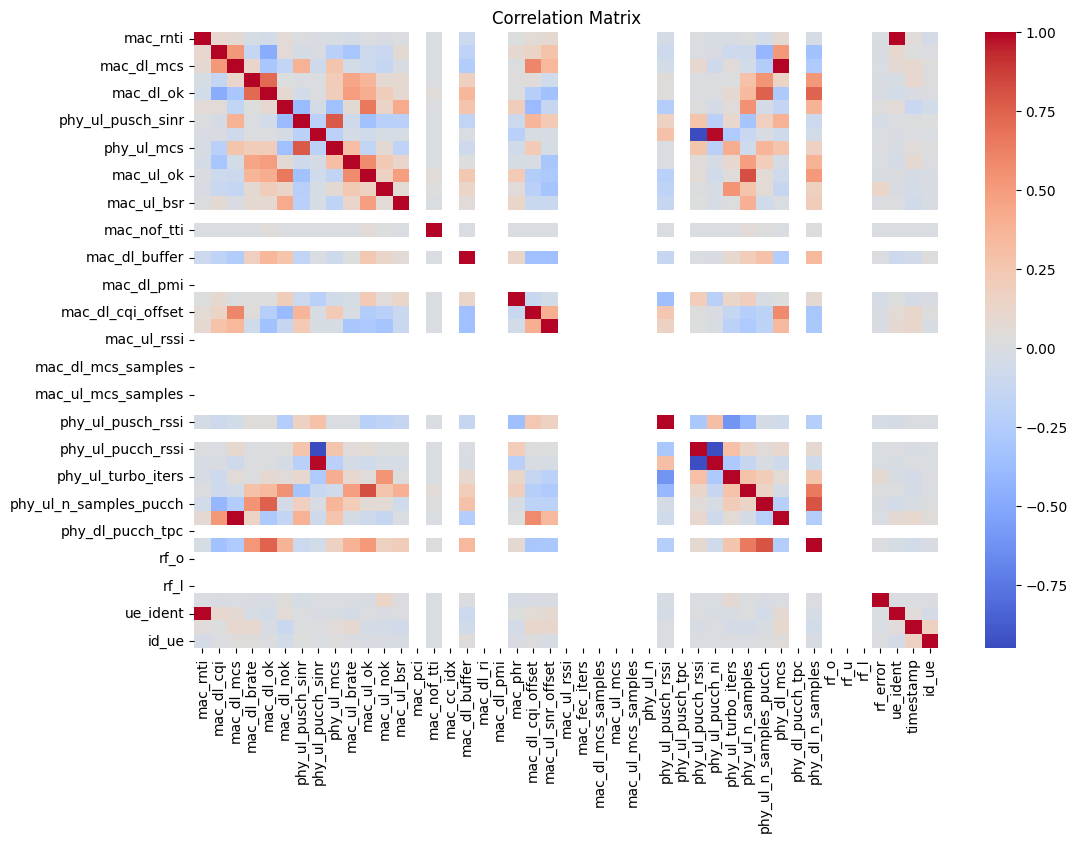

In [ ]:
# Plot the cross-correlation matrix
corr_matrix = RANperfdf.corr()

# Plot the cross-correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

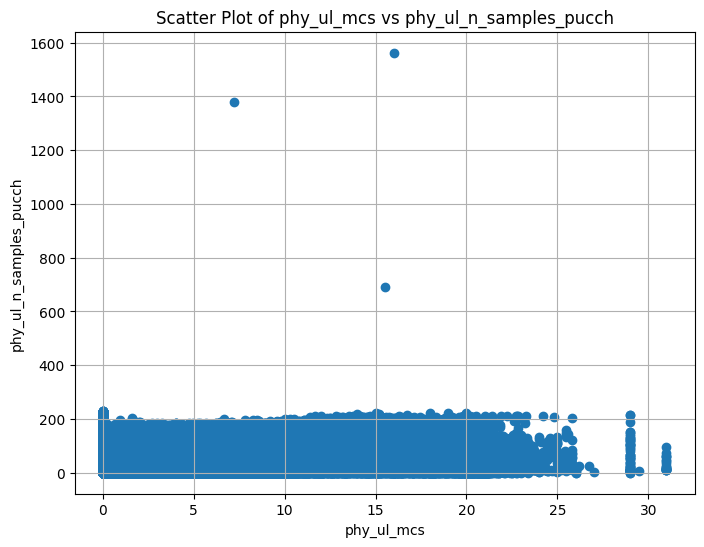

In [ ]:

# Scatter plot for phy_ul_mcs vs phy_ul_n_samples_pucch
plt.figure(figsize=(8, 6))
plt.scatter(RANperfdf['phy_ul_mcs'], RANperfdf['phy_ul_n_samples_pucch'])
plt.xlabel('phy_ul_mcs')
plt.ylabel('phy_ul_n_samples_pucch')
plt.title('Scatter Plot of phy_ul_mcs vs phy_ul_n_samples_pucch')
plt.grid(True)
plt.show()


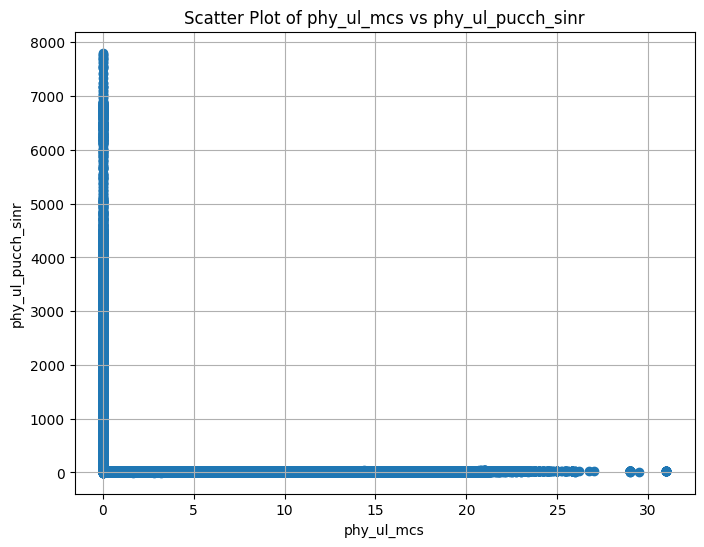

In [ ]:

# Scatter plot for phy_ul_mcs vs phy_ul_pucch_sinr
plt.figure(figsize=(8, 6))
plt.scatter(RANperfdf['phy_ul_mcs'], RANperfdf['phy_ul_pucch_sinr'])
plt.xlabel('phy_ul_mcs')
plt.ylabel('phy_ul_pucch_sinr')
plt.title('Scatter Plot of phy_ul_mcs vs phy_ul_pucch_sinr')
plt.grid(True)
plt.show()


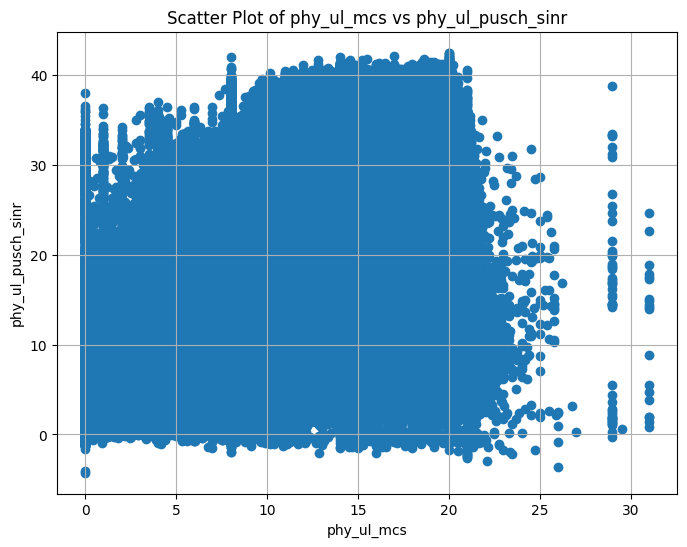

In [ ]:

# Scatter plot for phy_ul_mcs vs phy_ul_pusch_sinr
plt.figure(figsize=(8, 6))
plt.scatter(RANperfdf['phy_ul_mcs'], RANperfdf['phy_ul_pusch_sinr'])
plt.xlabel('phy_ul_mcs')
plt.ylabel('phy_ul_pusch_sinr')
plt.title('Scatter Plot of phy_ul_mcs vs phy_ul_pusch_sinr')
plt.grid(True)
plt.show()


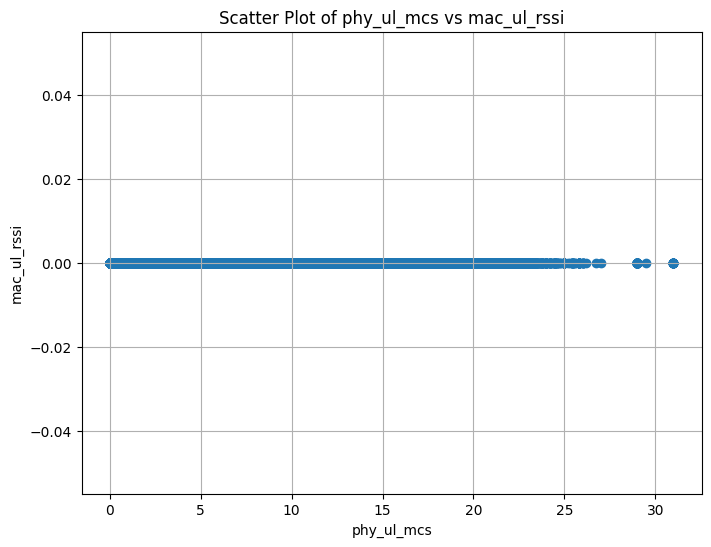

In [ ]:

# Scatter plot for phy_ul_mcs vs mac_ul_rssi
plt.figure(figsize=(8, 6))
plt.scatter(RANperfdf['phy_ul_mcs'], RANperfdf['mac_ul_rssi'])
plt.xlabel('phy_ul_mcs')
plt.ylabel('mac_ul_rssi')
plt.title('Scatter Plot of phy_ul_mcs vs mac_ul_rssi')
plt.grid(True)
plt.show()




---
Plotting data distribution patterns


---




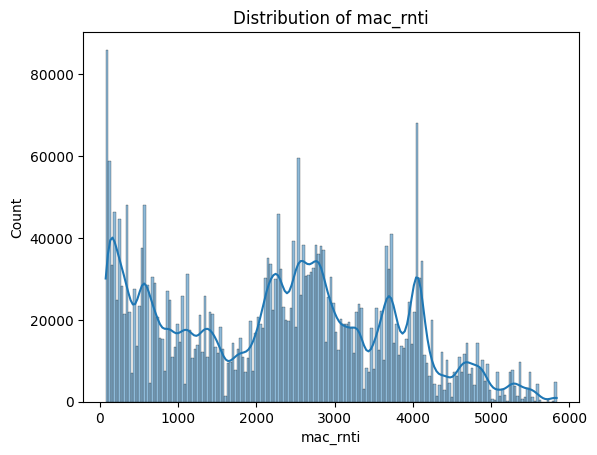

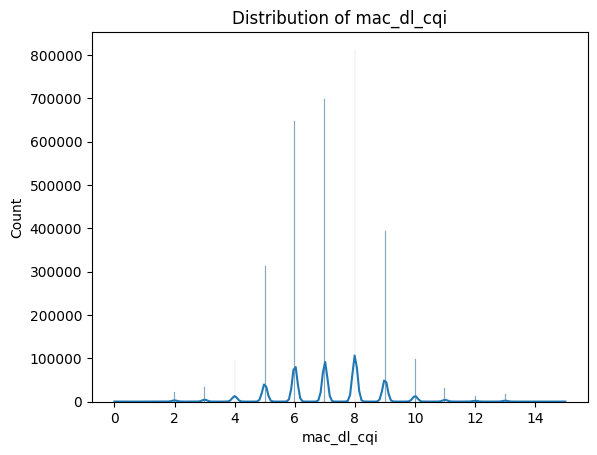

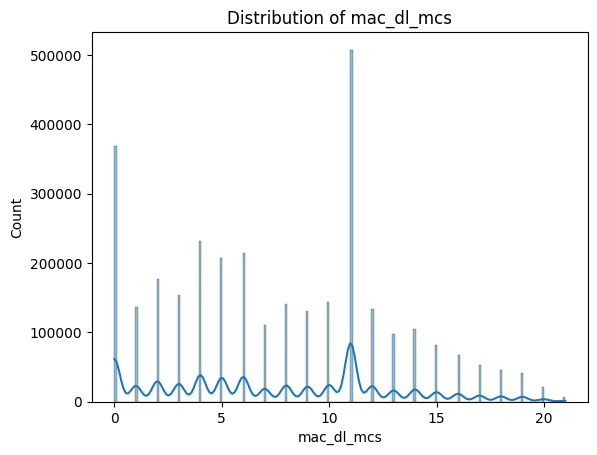

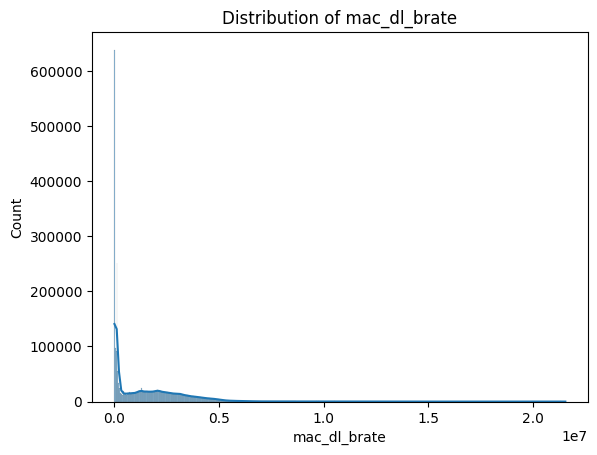

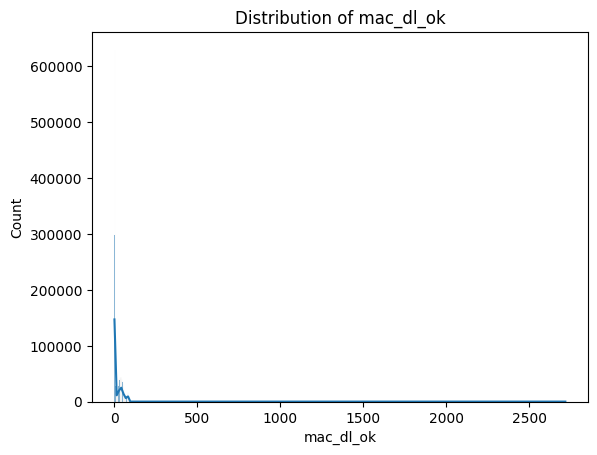

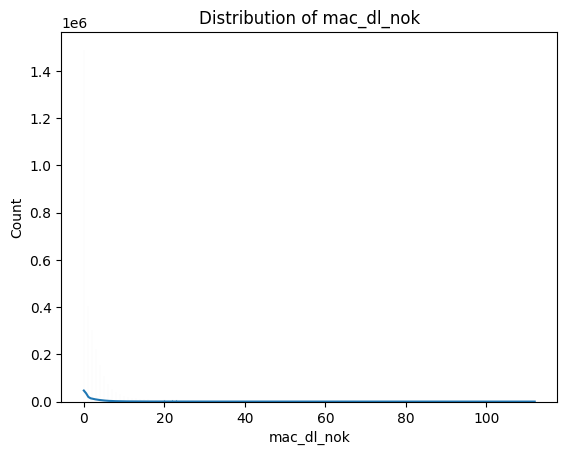

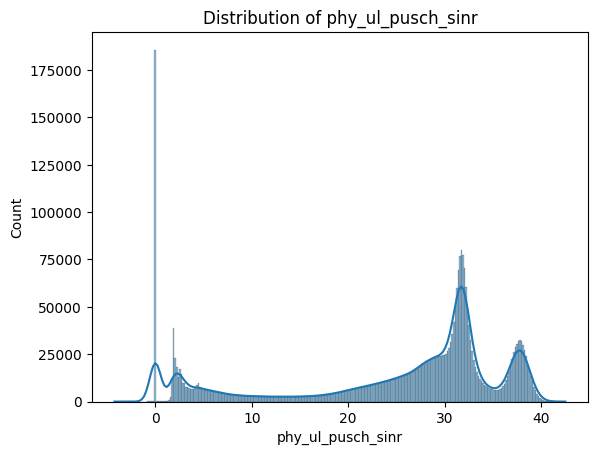

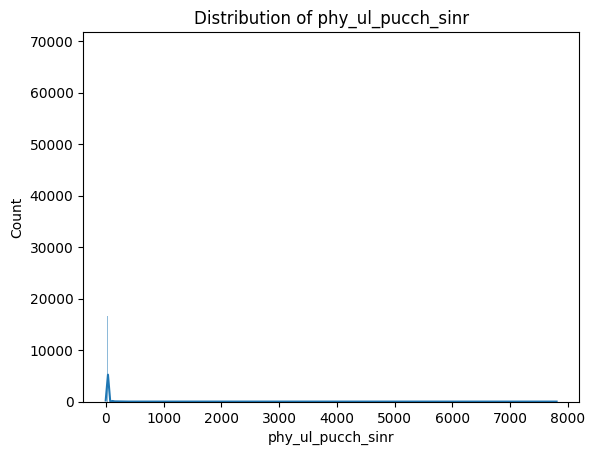

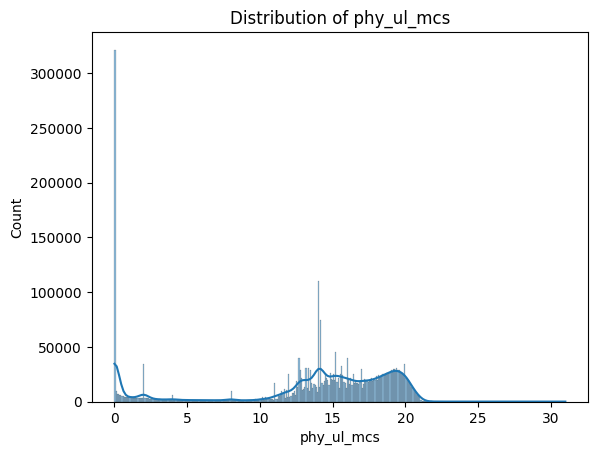

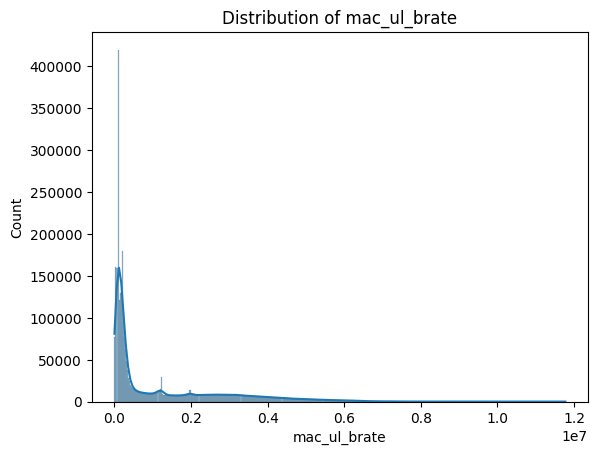

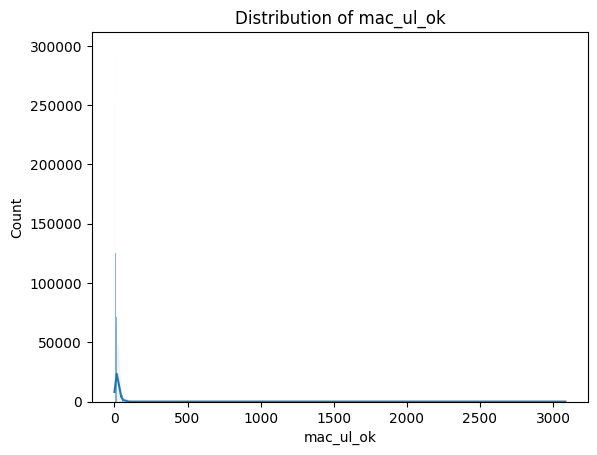

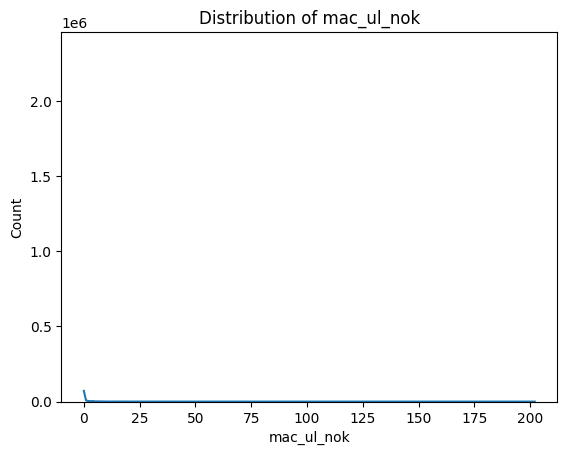

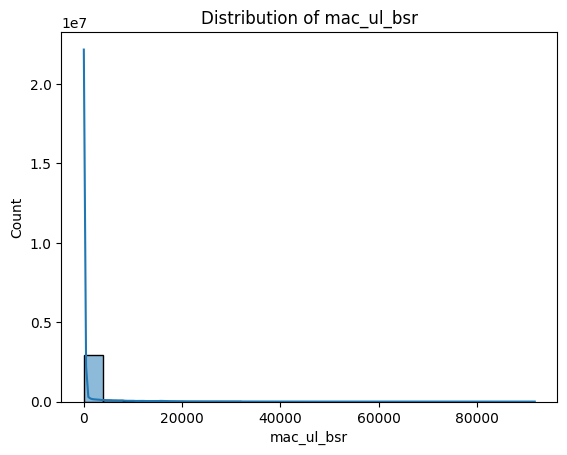

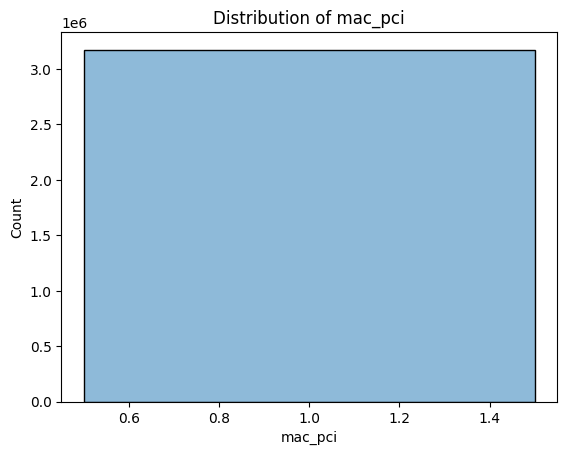

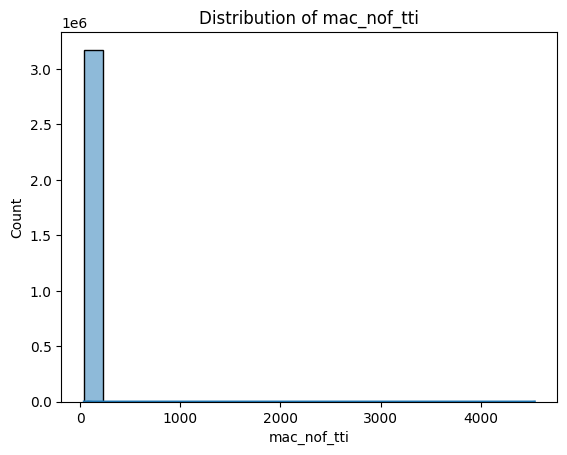

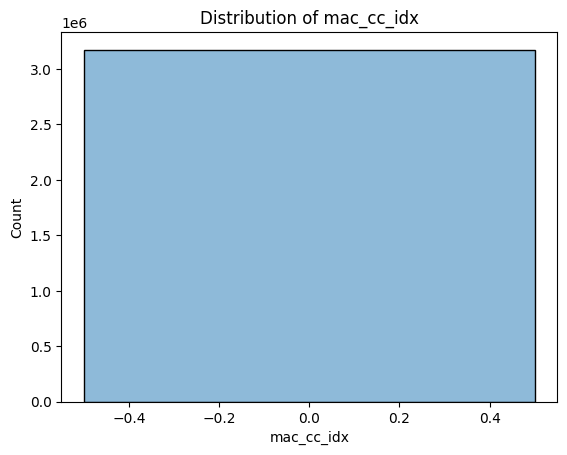

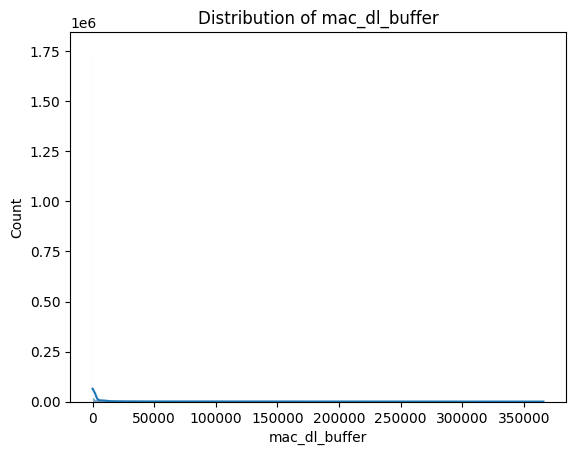

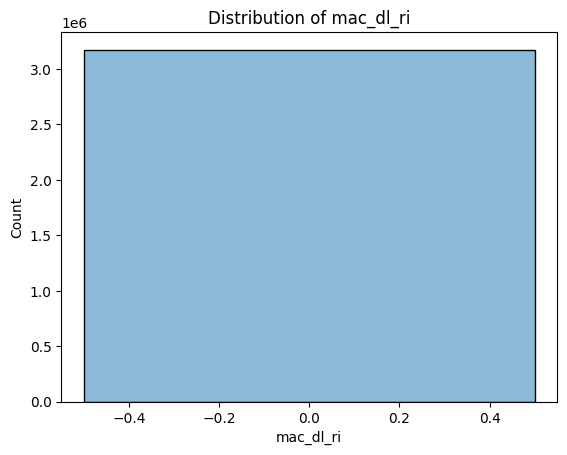

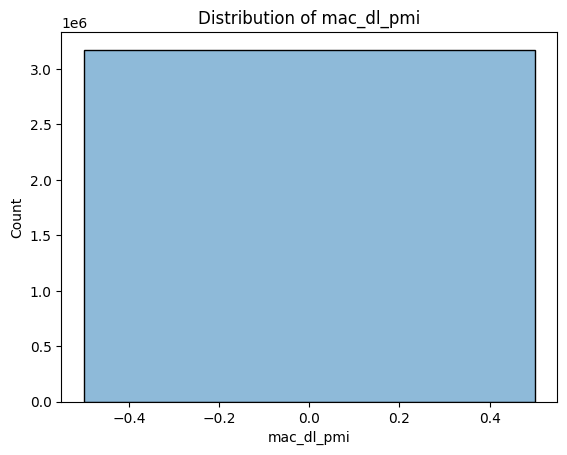

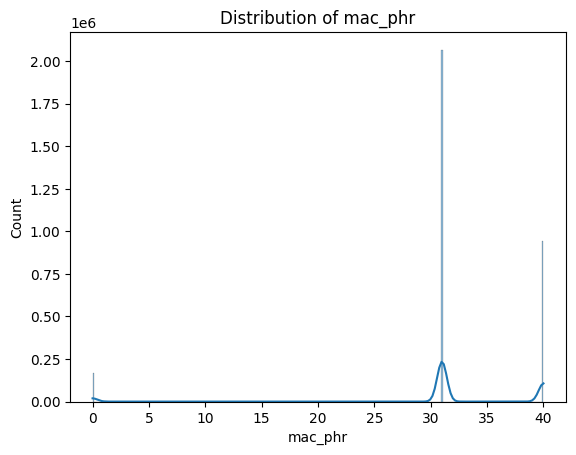

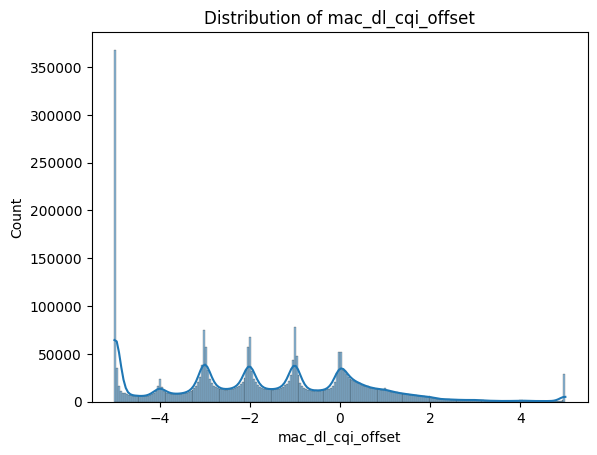

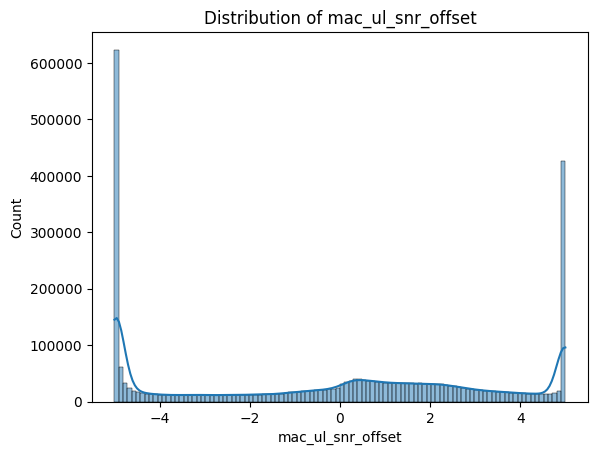

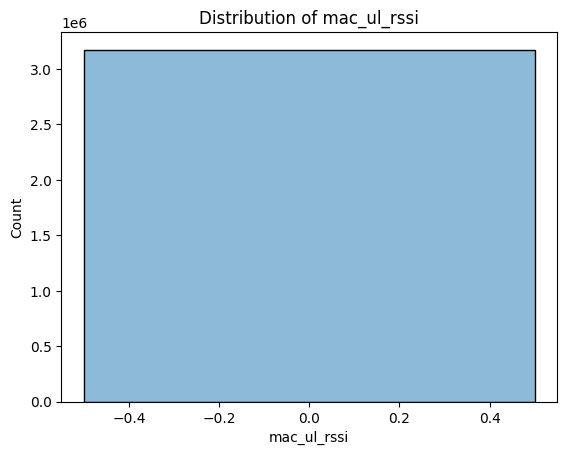

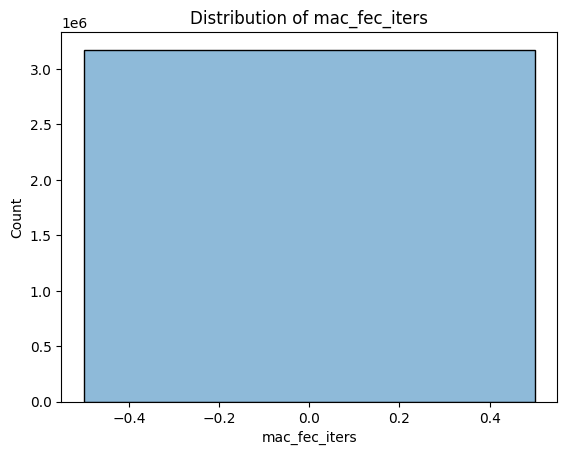

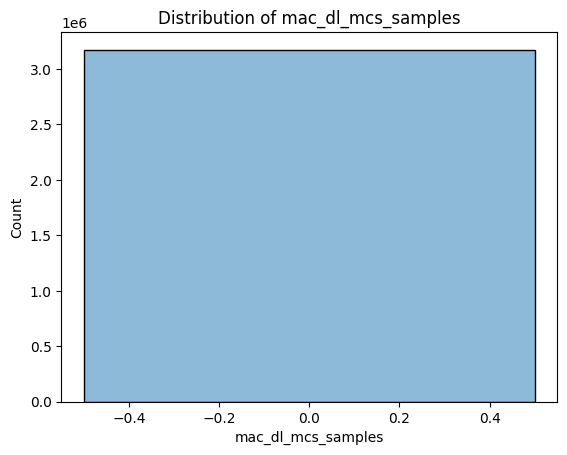

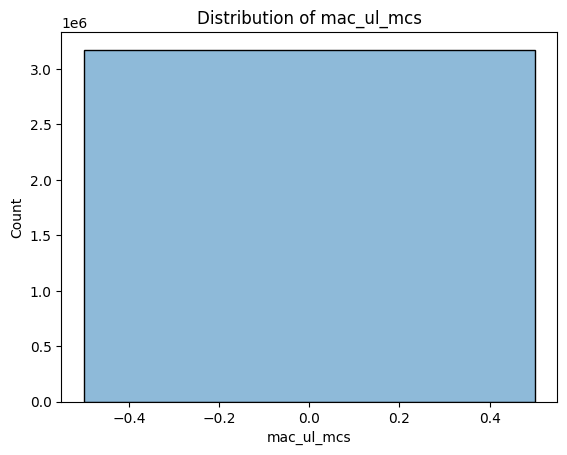

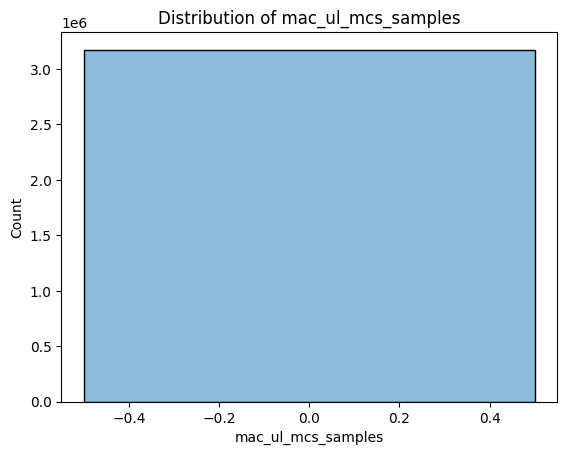

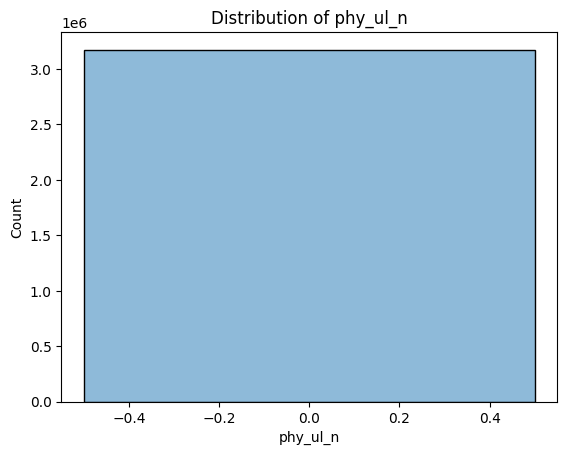

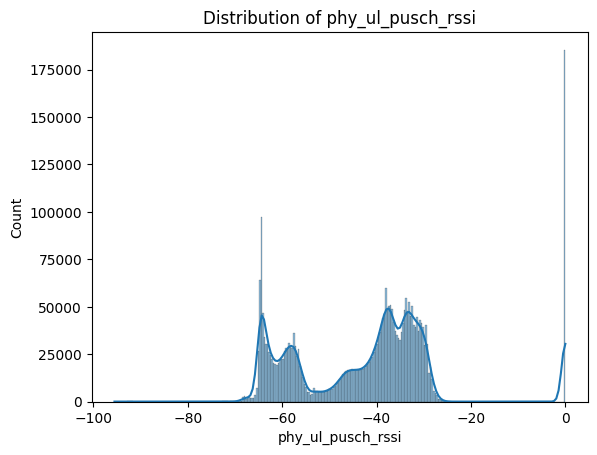

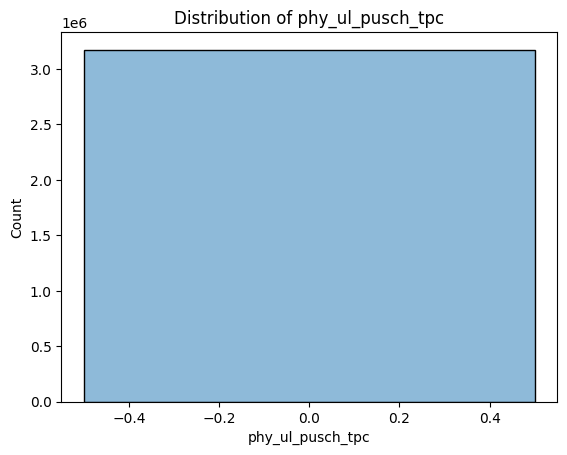

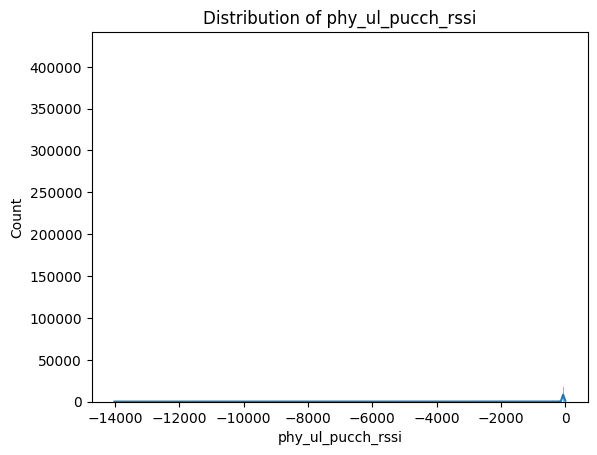

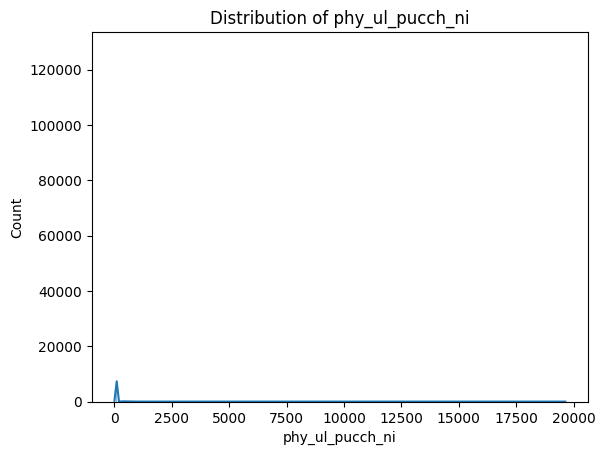

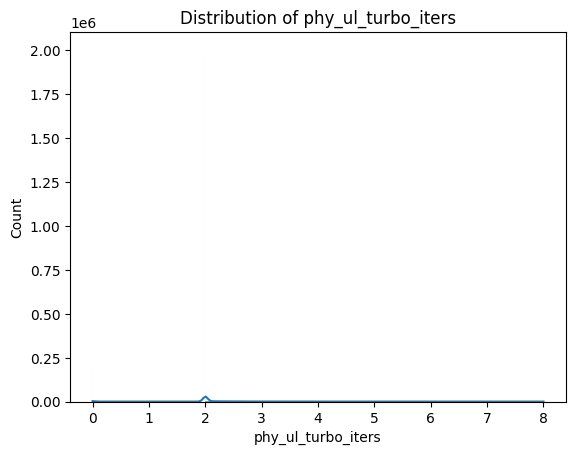

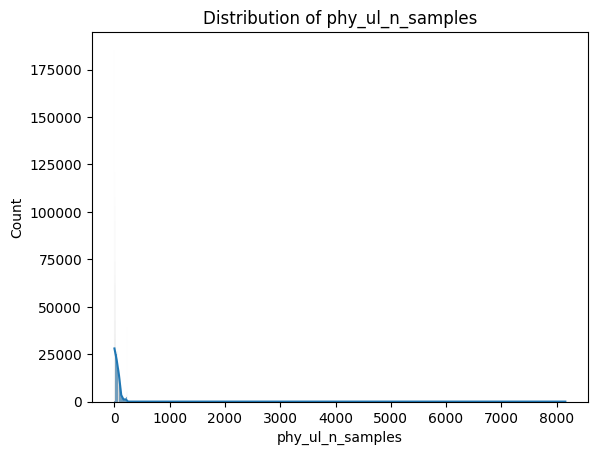

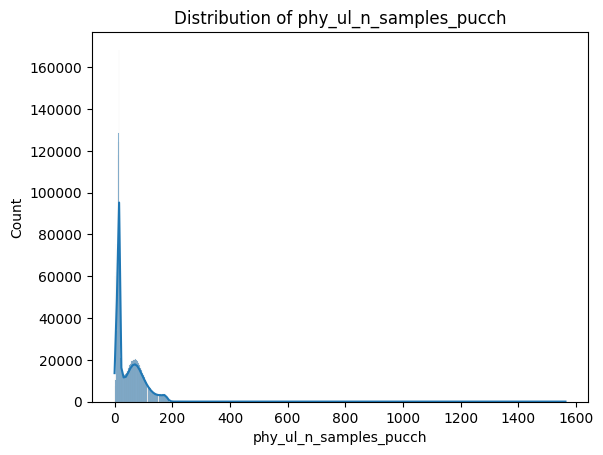

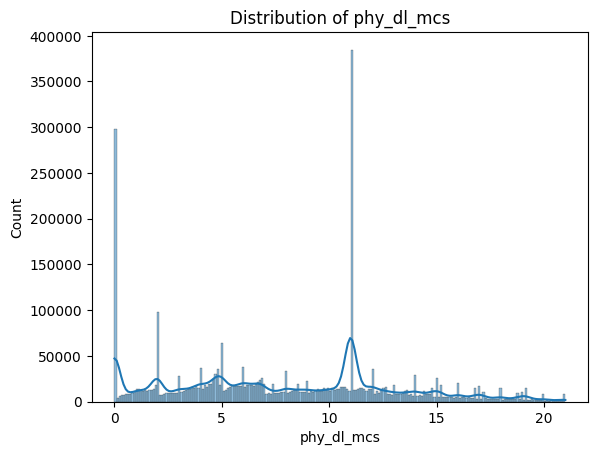

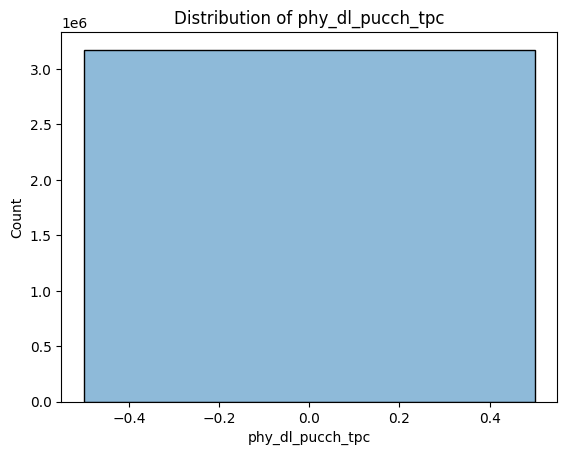

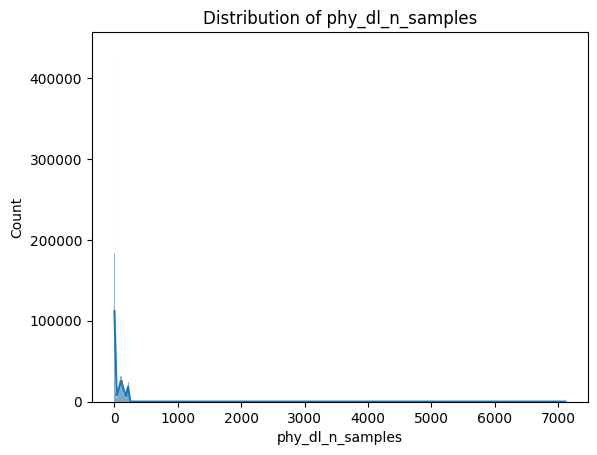

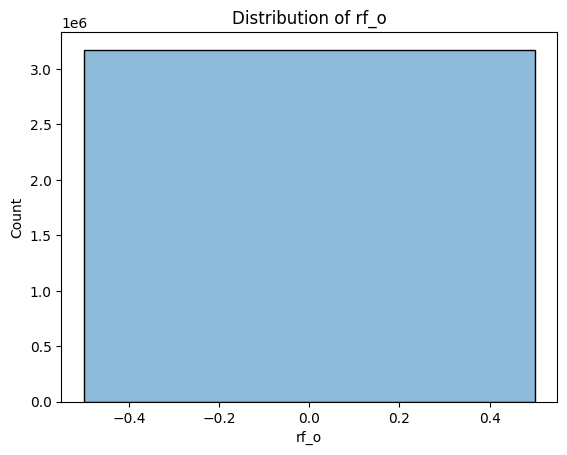

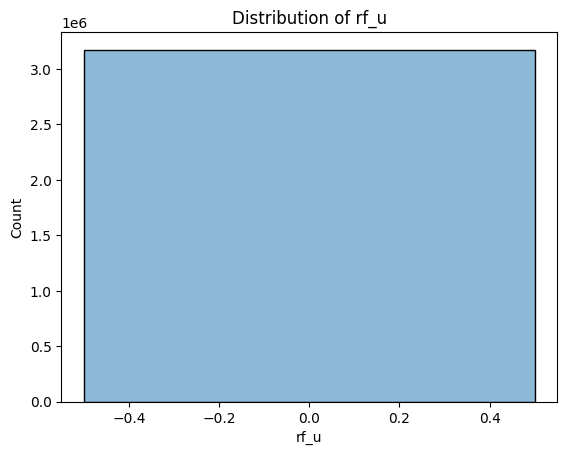

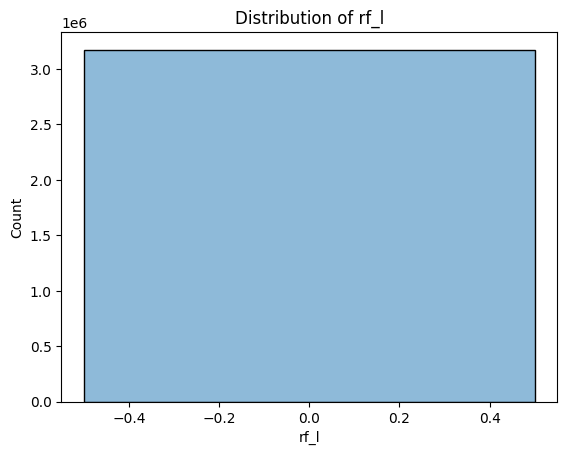

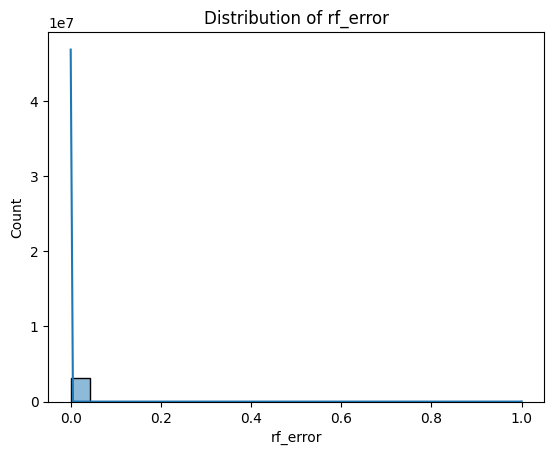

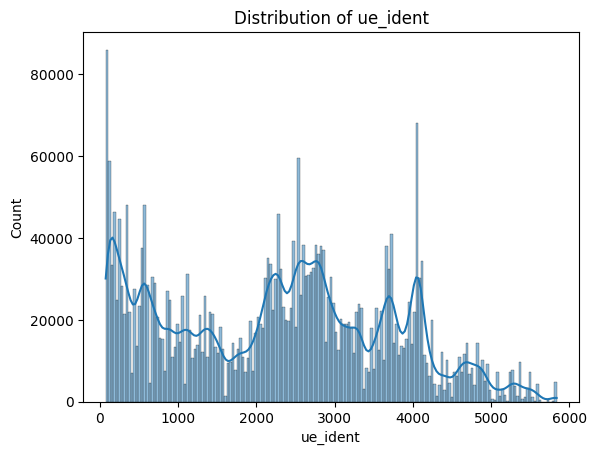

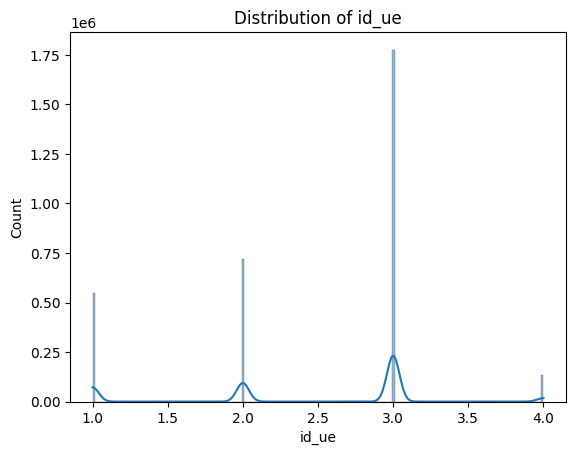

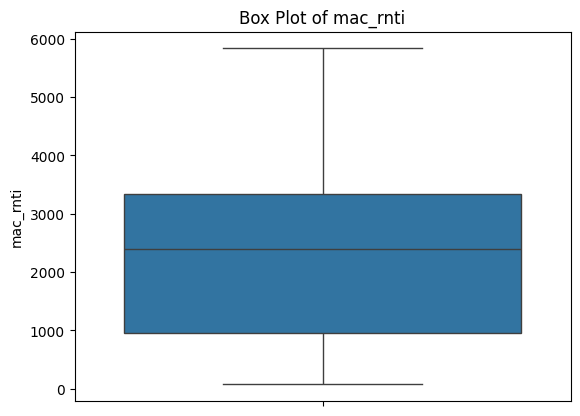

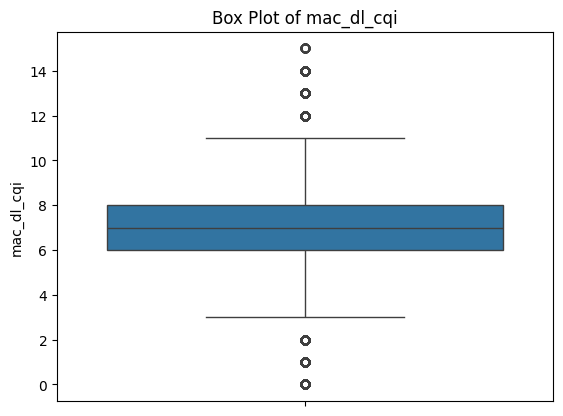

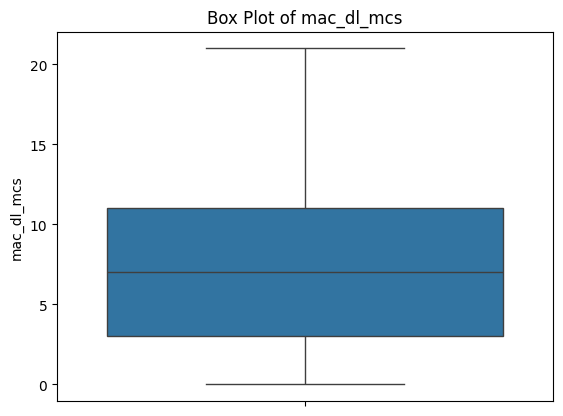

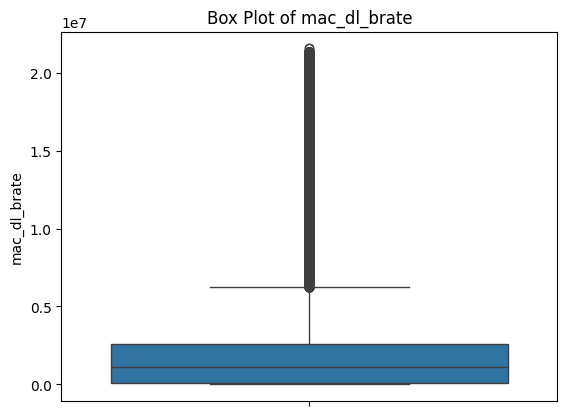

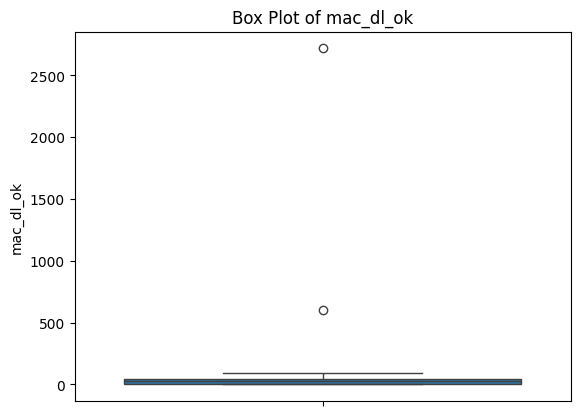

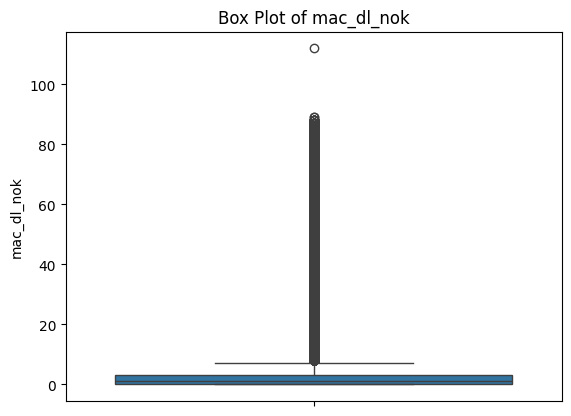

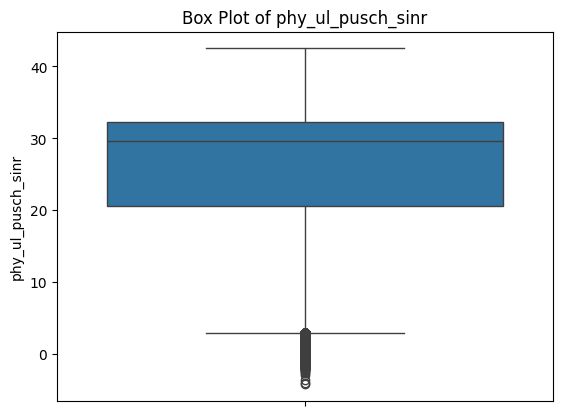

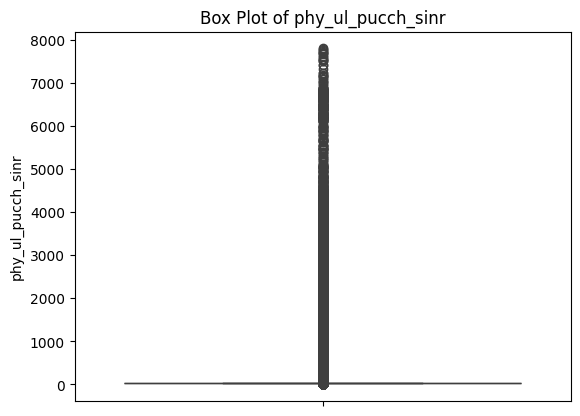

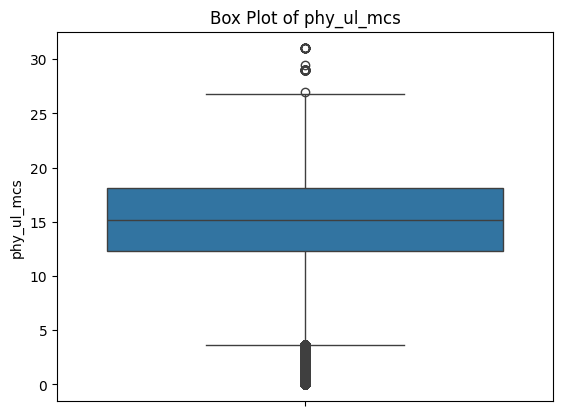

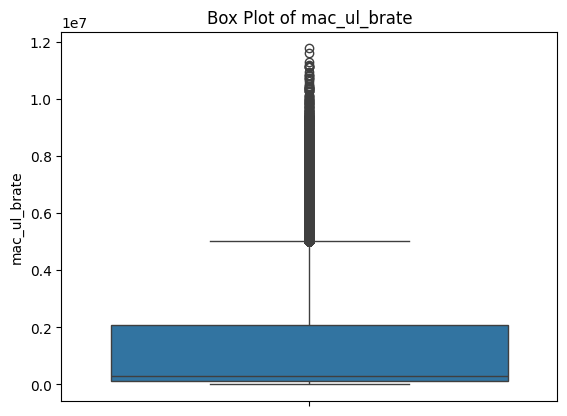

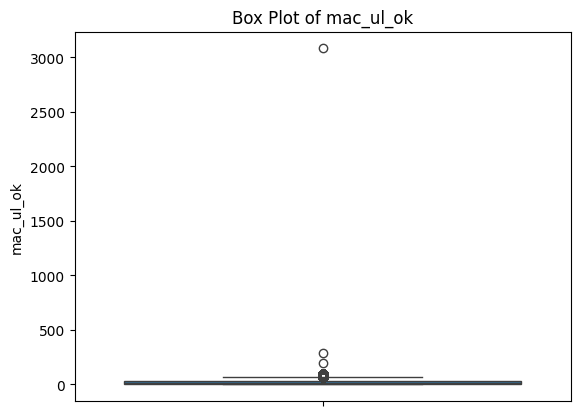

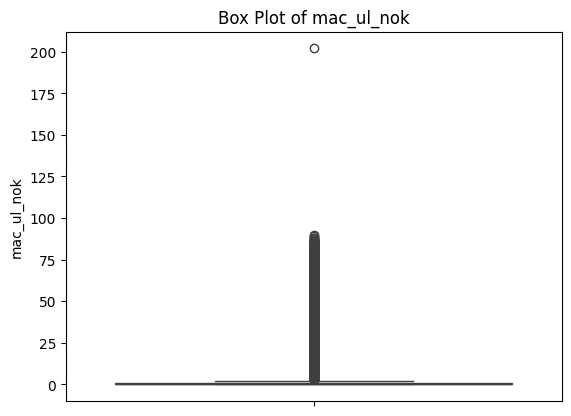

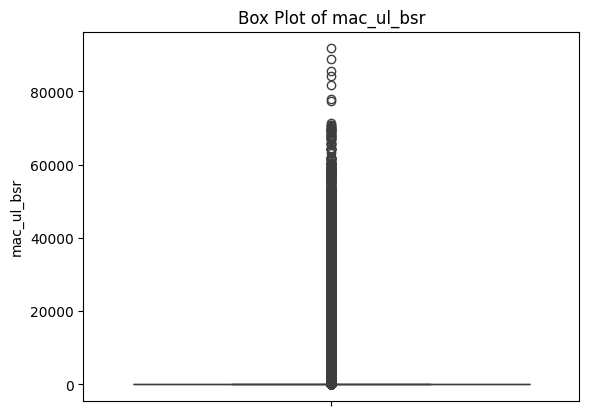

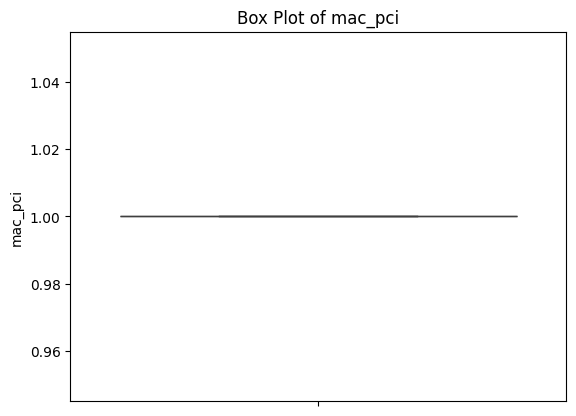

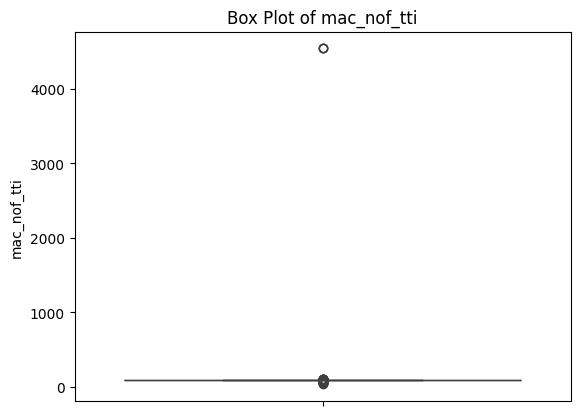

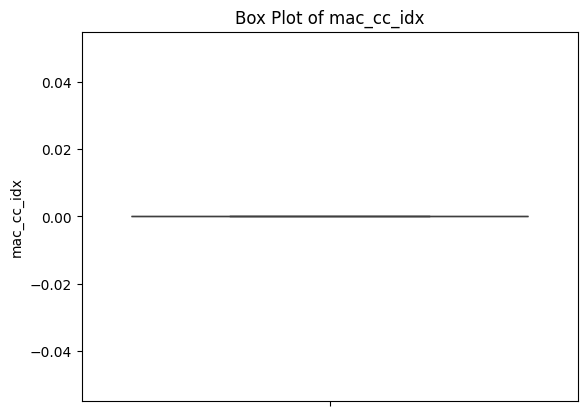

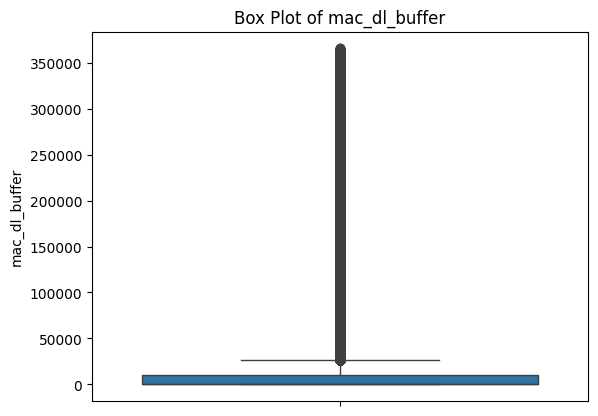

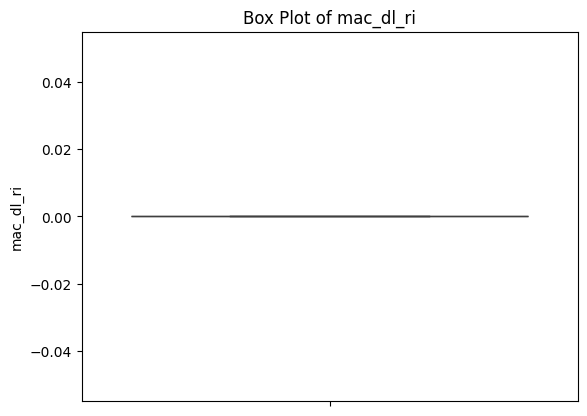

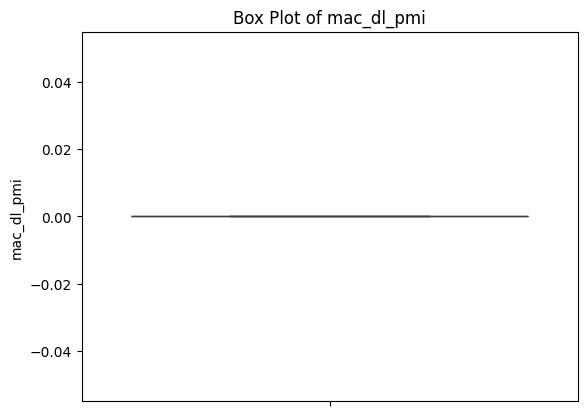

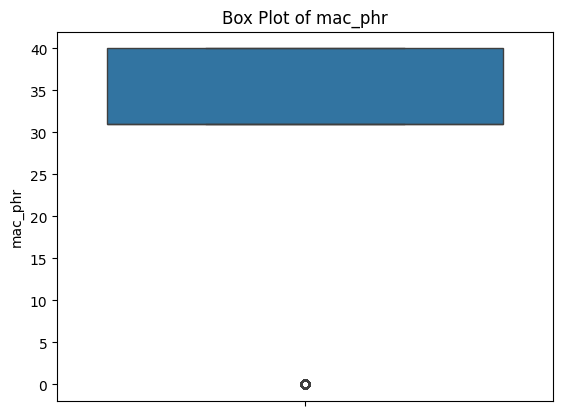

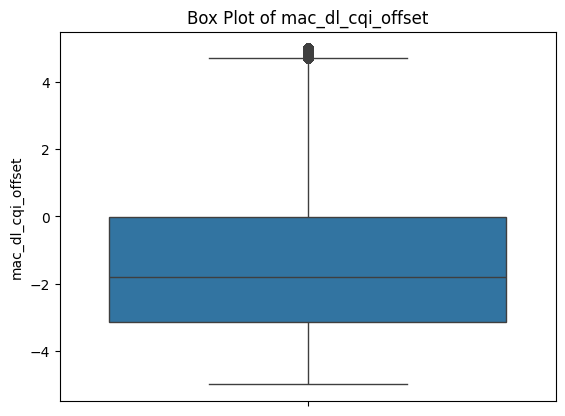

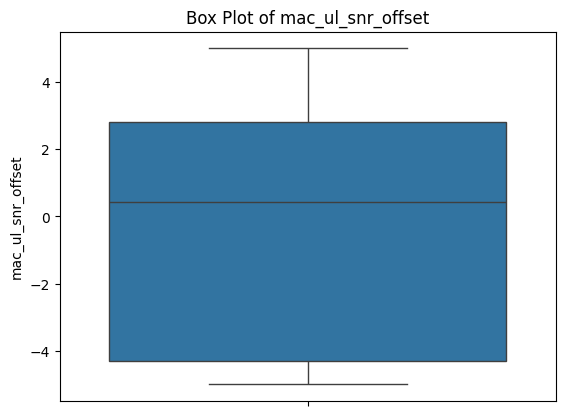

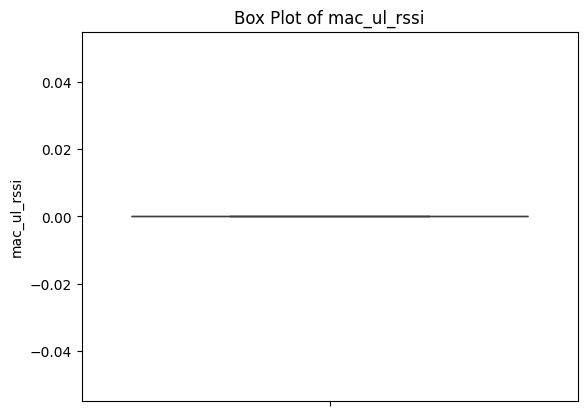

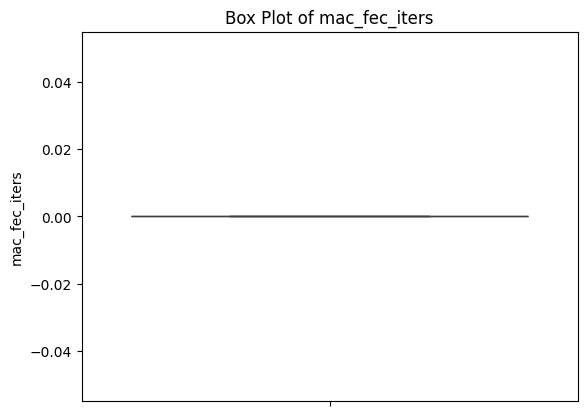

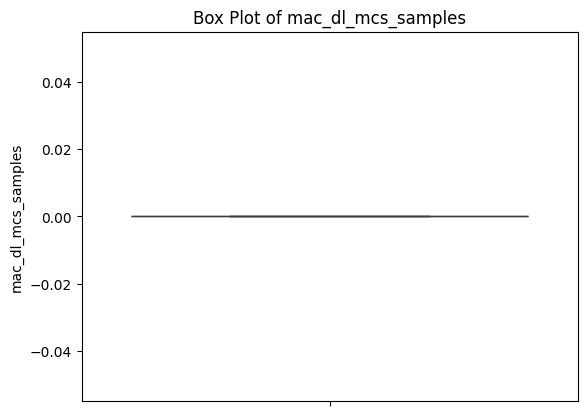

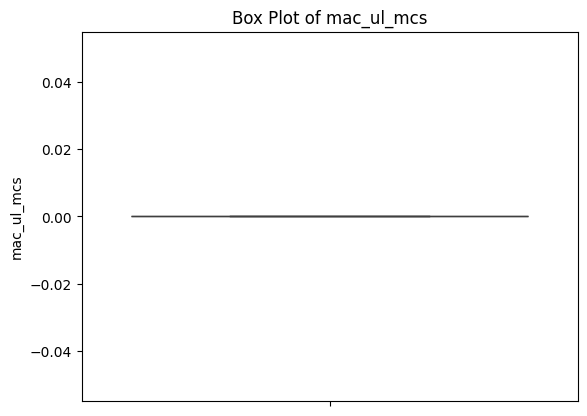

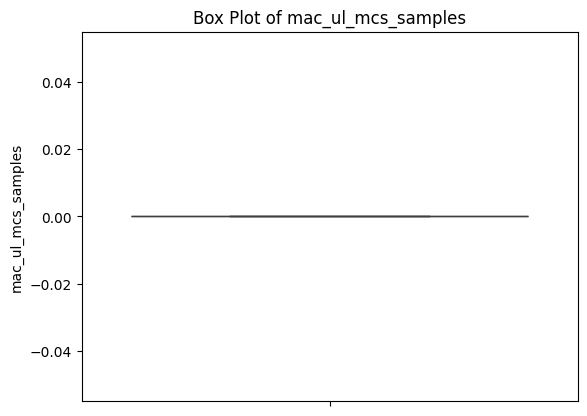

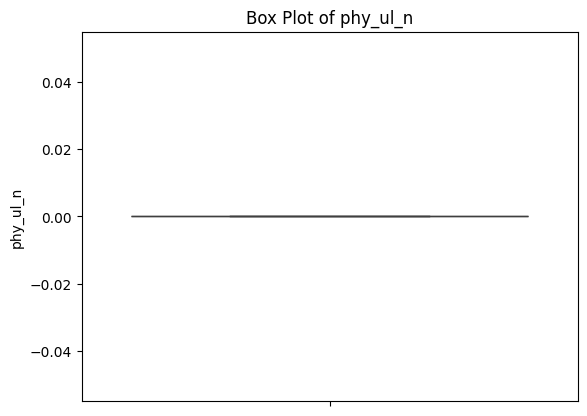

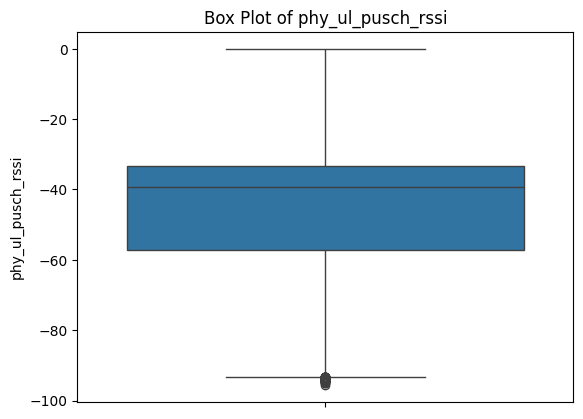

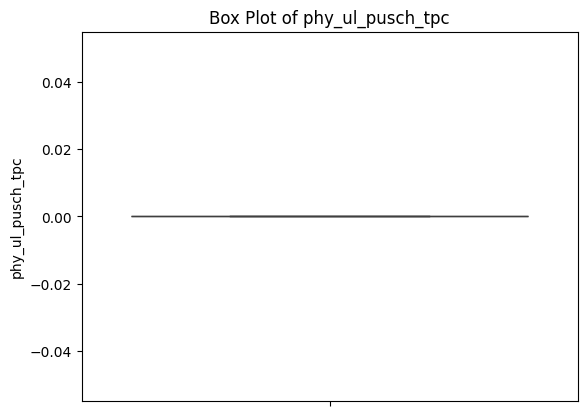

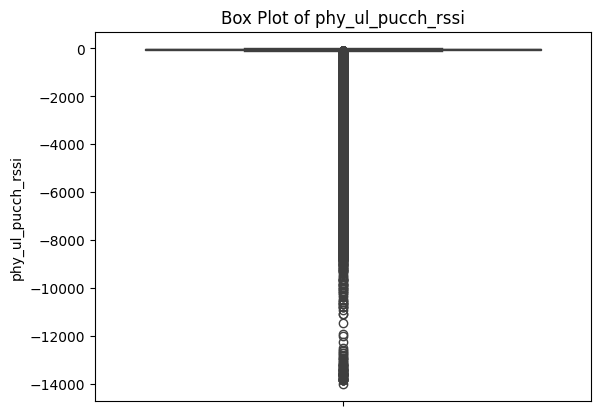

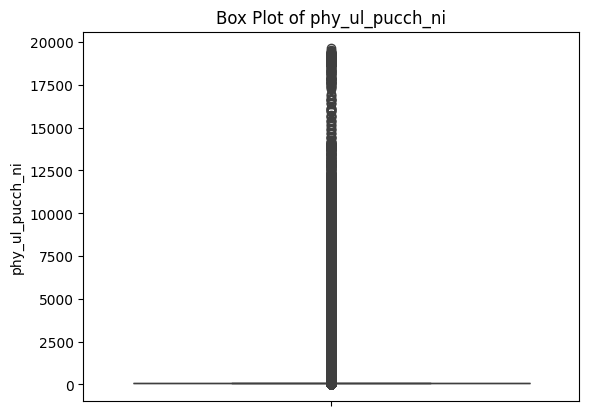

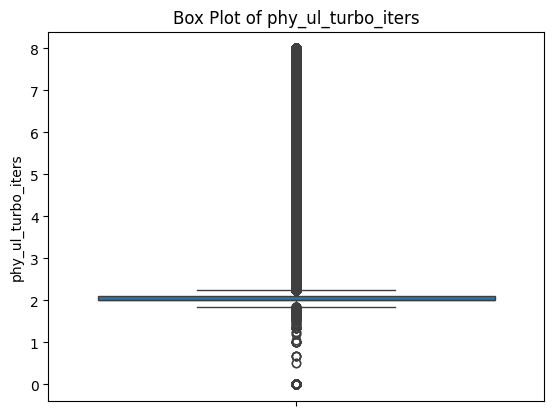

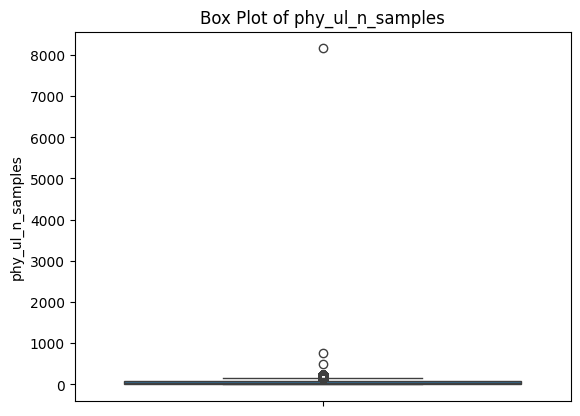

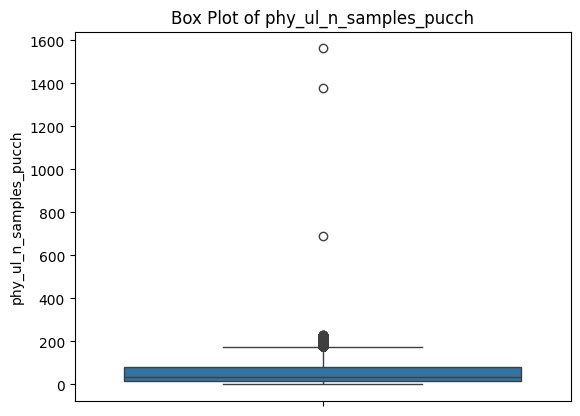

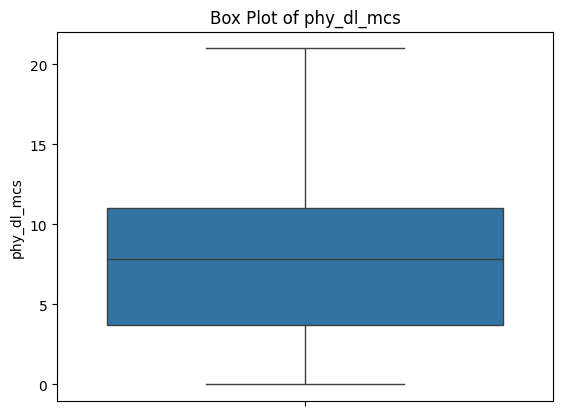

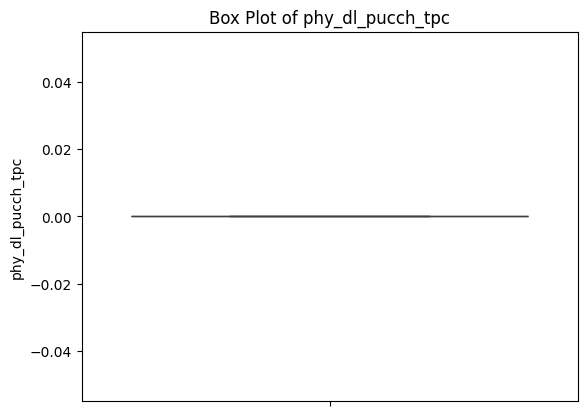

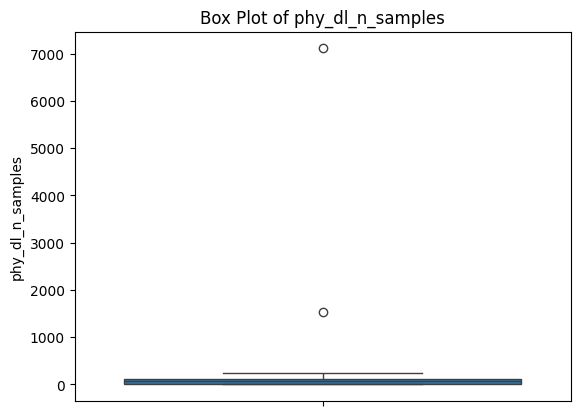

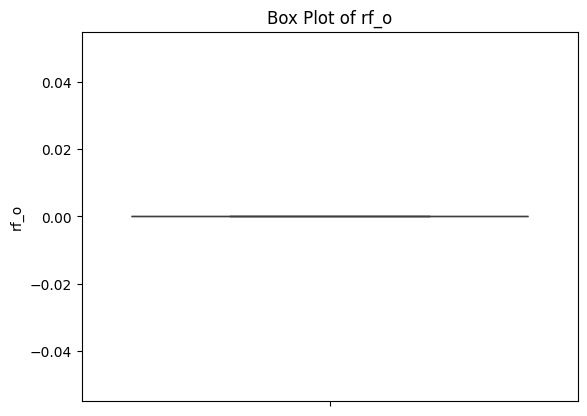

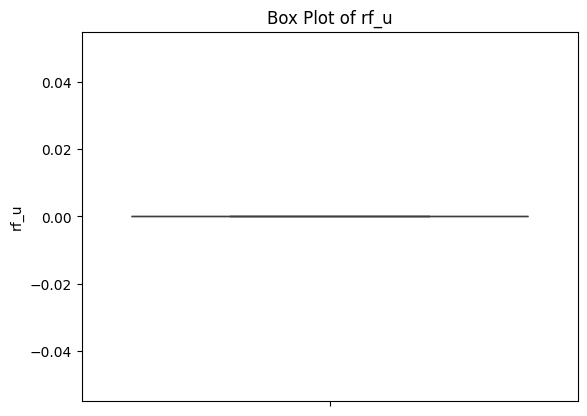

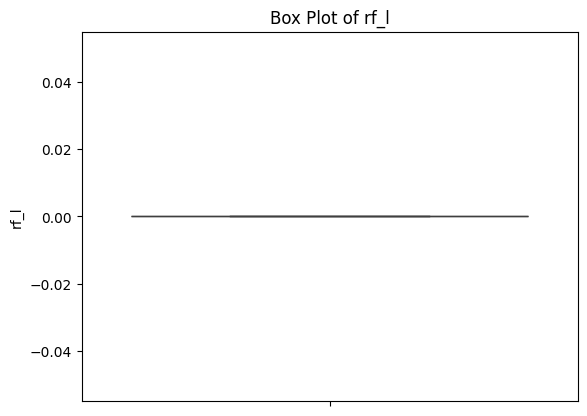

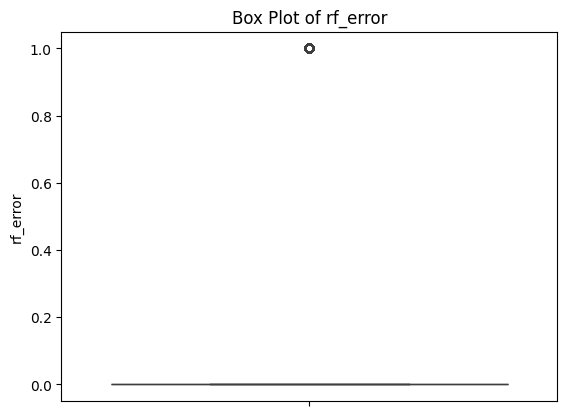

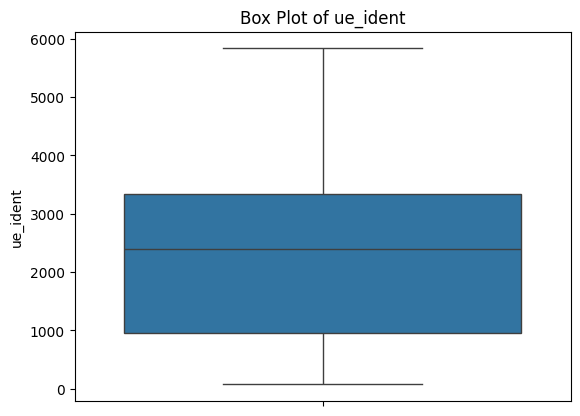

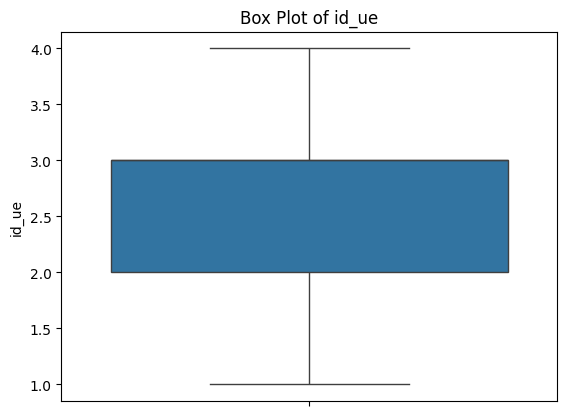

In [ ]:
# Plot histograms for numerical features
numerical_features = RANperfdf.select_dtypes(include=['float', 'int']).columns
for feature in numerical_features:
  plt.figure()
  sns.histplot(RANperfdf[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()

# Plot box plots for numerical features to visualize outliers
for feature in numerical_features:
  plt.figure()
  sns.boxplot(y=RANperfdf[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()


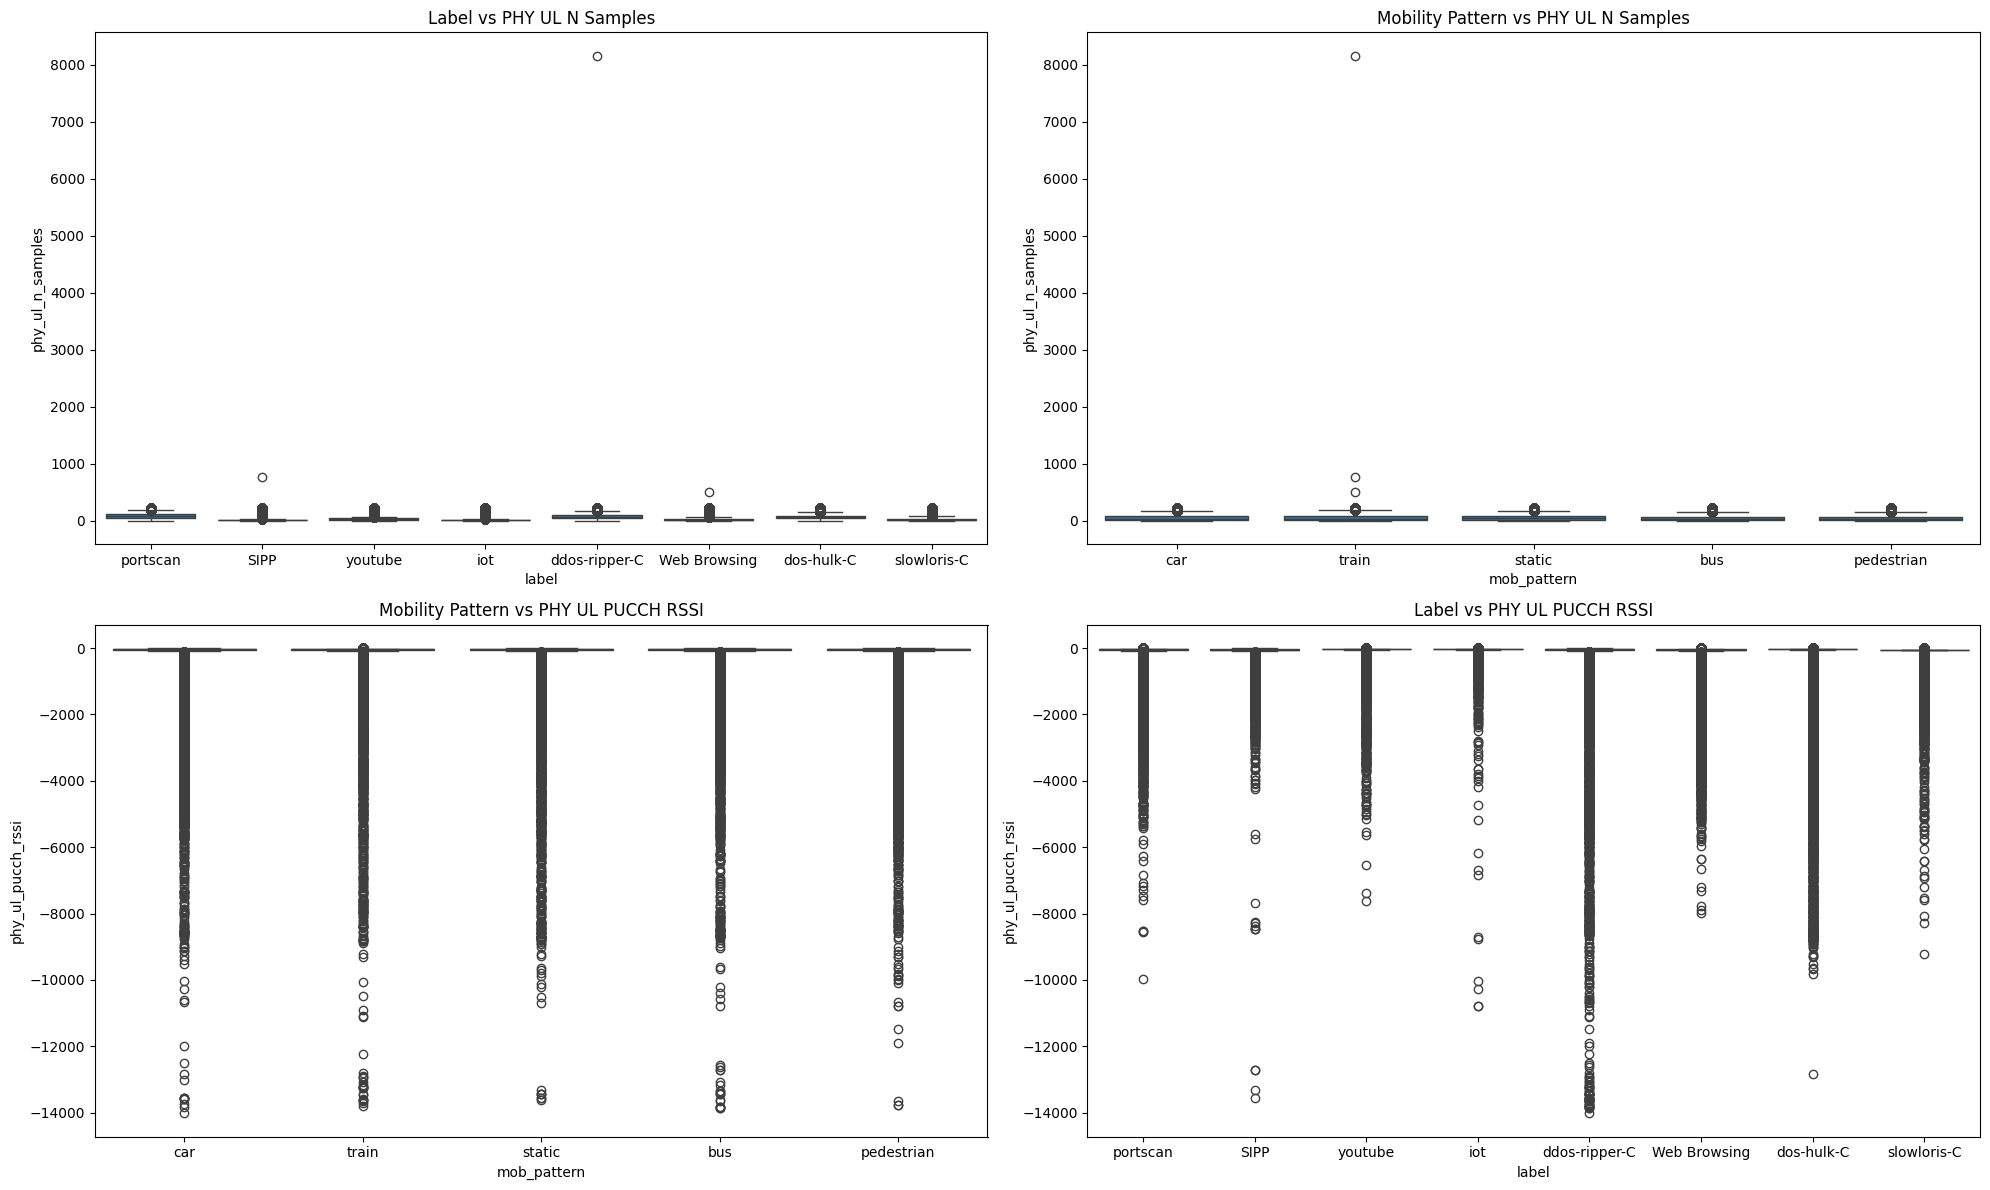

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# 'label' vs 'phy_ul_n_samples'
sns.boxplot(x='label', y='phy_ul_n_samples', data=RANperfdf, ax=axes[0, 0])
axes[0, 0].set_title('Label vs PHY UL N Samples')

# 'mob_pattern' vs 'phy_ul_n_samples'
sns.boxplot(x='mob_pattern', y='phy_ul_n_samples', data=RANperfdf, ax=axes[0, 1])
axes[0, 1].set_title('Mobility Pattern vs PHY UL N Samples')

# 'mob_pattern' vs 'phy_ul_pucch_rssi'
sns.boxplot(x='mob_pattern', y='phy_ul_pucch_rssi', data=RANperfdf, ax=axes[1, 0])
axes[1, 0].set_title('Mobility Pattern vs PHY UL PUCCH RSSI')

# 'label' vs 'phy_ul_pucch_rssi'
sns.boxplot(x='label', y='phy_ul_pucch_rssi', data=RANperfdf, ax=axes[1, 1])
axes[1, 1].set_title('Label vs PHY UL PUCCH RSSI')

plt.tight_layout()
plt.show()
